In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Getting a hold of dataset and cleaning  TRAIN

In [2]:
df = pd.read_csv('data/train.csv')
df = df.drop(columns=['id'])
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692
2,0.84,Ideal,G,VS1,61.4,56.0,6.04,6.15,3.74,4372
3,1.55,Ideal,H,VS1,62.0,57.0,7.37,7.43,4.59,13665
4,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66,422


In [3]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df.shape

(40455, 10)

In [6]:
df["cut"].unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [7]:
df["clarity"].unique()

array(['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

Context into diamond clarity parameters:

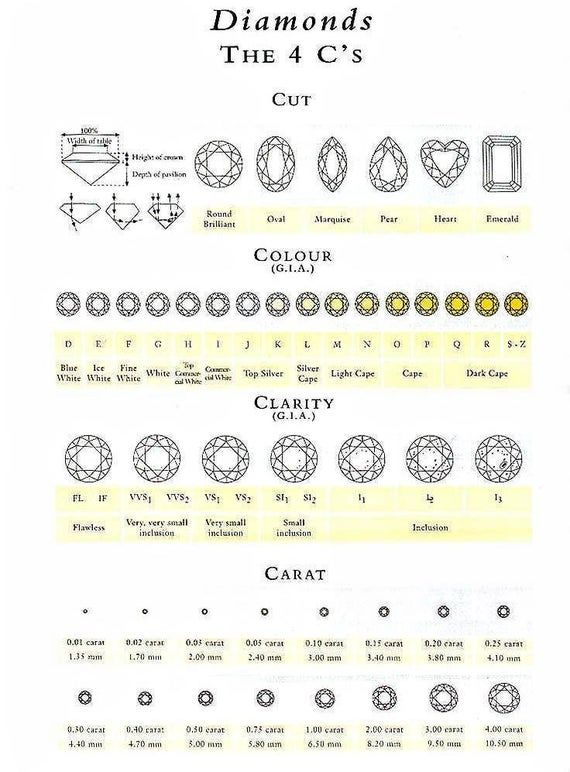

- Flawless (FL) No inclusions and no blemishes visible under 10x magnification
- Internally Flawless (IF) No inclusions visible under 10x magnification
- Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
- Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor
- Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification
- Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance

In [8]:
df["color"].unique()

array(['G', 'H', 'F', 'J', 'E', 'I', 'D'], dtype=object)

In [9]:
# Mean price per cut distinction
print(df[df["cut"] == "Ideal"].price.mean())
print(df[df["cut"] == "Premium"].price.mean())
print(df[df["cut"] == "Very Good"].price.mean())
print(df[df["cut"] == "Good"].price.mean())
print(df[df["cut"] == "Fair"].price.mean())
# We can see that cut quality does not reflect mean price, we must have another variable affecting this

3476.2735132464645
4581.108338996214
3977.0504983388705
3943.9072776280323
4363.128583128583


In [10]:
# Again we want to distinguish the mean price given the color distinction
print(df[df["color"] == "D"].price.mean())
print(df[df["color"] == "E"].price.mean())
print(df[df["color"] == "F"].price.mean())
print(df[df["color"] == "G"].price.mean())
print(df[df["color"] == "H"].price.mean())
print(df[df["color"] == "I"].price.mean())
print(df[df["color"] == "J"].price.mean())
# We have a similar scenario than with cut, another variable must be explaining the price difference
# In a way this also explains why price is the objective variable

3185.1613867304245
3066.2002450313094
3743.0055756899915
3991.1396146116563
4509.8203411445875
5067.355473554736
5351.783388390751


In [11]:
# We are going to assign a numerical value to cut value, helping myself with a dictionary

dict_cut = {
    "Ideal": 1,
    "Premium": 2,
    "Very Good": 3,
    "Good": 4,
    "Fair": 5
}

In [12]:
# Use map to directly iterate through the dataset and swicth objects with the numbers in the created dict
df.cut = df.cut.map(dict_cut)

In [13]:
#Same dictionary process with color

dict_col = {
    'D': 1,
    'E': 2,
    'F': 3,
    'G': 4,
    'H': 5,
    'I': 6,
    'J': 7   
}

In [14]:
df.color = df.color.map(dict_col)

In [15]:
# We repeat the process for clarity

dict_cla = {
    'IF': 1,
    'VVS1': 2,
    'VVS2': 3,
    'VS1': 4,
    'VS2': 5, 
    'SI1': 6,
    'SI2': 7, 
    'I1': 8
}

In [16]:
df.clarity = df.clarity.map(dict_cla)

In [17]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.14,1,4,3,61.0,56.0,6.74,6.76,4.12,9013
1,0.76,1,5,5,62.7,57.0,5.86,5.82,3.66,2692
2,0.84,1,4,4,61.4,56.0,6.04,6.15,3.74,4372
3,1.55,1,5,4,62.0,57.0,7.37,7.43,4.59,13665
4,0.30,1,4,7,61.9,57.0,4.28,4.31,2.66,422
...,...,...,...,...,...,...,...,...,...,...
40450,0.40,1,2,2,60.8,57.0,4.79,4.82,2.92,1278
40451,0.52,1,7,7,61.6,55.0,5.16,5.19,3.19,924
40452,1.00,3,2,6,59.4,63.0,6.47,6.42,3.83,5322
40453,0.57,3,2,4,62.9,56.0,5.31,5.35,3.35,1942


In [18]:
df.dtypes
# Values in the three changed columns from object to ints

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [19]:
# With all the values in numeric form I can proceed to do a correlation analysis
df.corr()
# My dictionaries where done with highest numbers representing higher quality in clarity, cut, and color
# I changed them to have 1 as the best score because when I did the correlation function I would get many negative values.


,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.134463,0.292673,0.352151,0.025563,0.181437,0.976119,0.968747,0.969643,0.921128
cut,0.134463,1.000000,0.020104,0.190710,0.219509,0.433241,0.125122,0.123166,0.150823,0.052115
color,0.292673,0.020104,1.000000,-0.026766,0.049141,0.023844,0.271814,0.269470,0.274945,0.172244
clarity,0.352151,0.190710,-0.026766,1.000000,0.070941,0.156182,0.371832,0.364112,0.373575,0.145062
depth,0.025563,0.219509,0.049141,0.070941,1.000000,-0.297741,-0.028409,-0.031153,0.093987,-0.015052
table,0.181437,0.433241,0.023844,0.156182,-0.297741,1.000000,0.195592,0.187326,0.154194,0.127691
x,0.976119,0.125122,0.271814,0.371832,-0.028409,0.195592,1.000000,0.991276,0.986062,0.884874
y,0.968747,0.123166,0.269470,0.364112,-0.031153,0.187326,0.991276,1.000000,0.980160,0.880575
z,0.969643,0.150823,0.274945,0.373575,0.093987,0.154194,0.986062,0.980160,1.000000,0.875011
price,0.921128,0.052115,0.172244,0.145062,-0.015052,0.127691,0.884874,0.880575,0.875011,1.000000


In [20]:
# We are going to take price as its clear its the objective variable and this is our X dataset
df1 = df.drop(columns="price")

In [21]:
# Correlation function + heatmap
df1.corr().style.background_gradient(cmap='coolwarm')
# Some columns like carat, x, y, and z have too high correlations in some of their pairings
# Such high correlation can bring problems such as the memorization of the values by the computer

,carat,cut,color,clarity,depth,table,x,y,z
carat,1.000000,0.134463,0.292673,0.352151,0.025563,0.181437,0.976119,0.968747,0.969643
cut,0.134463,1.000000,0.020104,0.190710,0.219509,0.433241,0.125122,0.123166,0.150823
color,0.292673,0.020104,1.000000,-0.026766,0.049141,0.023844,0.271814,0.269470,0.274945
clarity,0.352151,0.190710,-0.026766,1.000000,0.070941,0.156182,0.371832,0.364112,0.373575
depth,0.025563,0.219509,0.049141,0.070941,1.000000,-0.297741,-0.028409,-0.031153,0.093987
table,0.181437,0.433241,0.023844,0.156182,-0.297741,1.000000,0.195592,0.187326,0.154194
x,0.976119,0.125122,0.271814,0.371832,-0.028409,0.195592,1.000000,0.991276,0.986062
y,0.968747,0.123166,0.269470,0.364112,-0.031153,0.187326,0.991276,1.000000,0.980160
z,0.969643,0.150823,0.274945,0.373575,0.093987,0.154194,0.986062,0.980160,1.000000


In [22]:
# I decide to first drop the column carat as its the one with most correlations over 90%
df1 = df1.drop(columns="carat")

In [23]:
df1.corr().style.background_gradient(cmap='coolwarm')
# We still need to make further changes

,cut,color,clarity,depth,table,x,y,z
cut,1.000000,0.020104,0.190710,0.219509,0.433241,0.125122,0.123166,0.150823
color,0.020104,1.000000,-0.026766,0.049141,0.023844,0.271814,0.269470,0.274945
clarity,0.190710,-0.026766,1.000000,0.070941,0.156182,0.371832,0.364112,0.373575
depth,0.219509,0.049141,0.070941,1.000000,-0.297741,-0.028409,-0.031153,0.093987
table,0.433241,0.023844,0.156182,-0.297741,1.000000,0.195592,0.187326,0.154194
x,0.125122,0.271814,0.371832,-0.028409,0.195592,1.000000,0.991276,0.986062
y,0.123166,0.269470,0.364112,-0.031153,0.187326,0.991276,1.000000,0.980160
z,0.150823,0.274945,0.373575,0.093987,0.154194,0.986062,0.980160,1.000000


In [24]:
df1 = df1.drop(columns="y")

In [25]:
df1.corr().style.background_gradient(cmap='coolwarm')

,cut,color,clarity,depth,table,x,z
cut,1.000000,0.020104,0.190710,0.219509,0.433241,0.125122,0.150823
color,0.020104,1.000000,-0.026766,0.049141,0.023844,0.271814,0.274945
clarity,0.190710,-0.026766,1.000000,0.070941,0.156182,0.371832,0.373575
depth,0.219509,0.049141,0.070941,1.000000,-0.297741,-0.028409,0.093987
table,0.433241,0.023844,0.156182,-0.297741,1.000000,0.195592,0.154194
x,0.125122,0.271814,0.371832,-0.028409,0.195592,1.000000,0.986062
z,0.150823,0.274945,0.373575,0.093987,0.154194,0.986062,1.000000


In [26]:
df1 = df1.drop(columns="z")

In [27]:
df1.corr().style.background_gradient(cmap='coolwarm')

,cut,color,clarity,depth,table,x
cut,1.000000,0.020104,0.190710,0.219509,0.433241,0.125122
color,0.020104,1.000000,-0.026766,0.049141,0.023844,0.271814
clarity,0.190710,-0.026766,1.000000,0.070941,0.156182,0.371832
depth,0.219509,0.049141,0.070941,1.000000,-0.297741,-0.028409
table,0.433241,0.023844,0.156182,-0.297741,1.000000,0.195592
x,0.125122,0.271814,0.371832,-0.028409,0.195592,1.000000


In [28]:
df1.head()

,cut,color,clarity,depth,table,x
0,1,4,3,61.0,56.0,6.74
1,1,5,5,62.7,57.0,5.86
2,1,4,4,61.4,56.0,6.04
3,1,5,4,62.0,57.0,7.37
4,1,4,7,61.9,57.0,4.28


In [29]:
df1.to_csv('data/cleaning_train1.csv', index=False)
# We do not need the index column

##  Cleaning our TEST dataset

Since values in both datasets are the same we repeat the same cleaning and data manipulation process here

In [30]:
dftest = pd.read_csv('data/test.csv')
dftest
# No need for column ID, with index its already repeated

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.00,Fair,J,SI2,56.3,64.0,6.58,6.54,3.69
1,1,0.83,Premium,G,SI1,62.3,58.0,6.01,5.97,3.73
2,2,1.00,Fair,E,SI2,67.0,53.0,6.19,6.13,4.13
3,3,1.00,Fair,H,SI2,66.5,62.0,6.19,6.10,4.09
4,4,1.20,Very Good,I,SI1,62.6,57.0,6.74,6.77,4.23
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.00,Premium,F,VVS2,61.5,59.0,6.40,6.38,3.93
13481,13481,2.12,Premium,I,SI2,60.6,59.0,8.30,8.27,5.02
13482,13482,1.10,Ideal,F,VS2,60.7,57.0,6.66,6.70,4.05
13483,13483,0.34,Good,I,VVS2,63.1,56.0,4.43,4.47,2.81


In [31]:
dftest = dftest.drop(columns=['id'])
dftest.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.00,Fair,J,SI2,56.3,64.0,6.58,6.54,3.69
1,0.83,Premium,G,SI1,62.3,58.0,6.01,5.97,3.73


In [32]:
# We are going to make the same dictionary process for the object type columns and also drop the same ones as with the train dataset
dftest = dftest.drop(columns=['carat'])
dftest = dftest.drop(columns=['y'])
dftest = dftest.drop(columns=['z'])

In [33]:
dict_cut = {"Ideal":1,
            "Premium": 2,
            "Very Good": 3,
            "Good": 4,
            "Fair":5,
}

In [34]:
dftest.cut = dftest.cut.map(dict_cut)

In [35]:
dict_col = {
    'D': 1,
    'E': 2,
    'F': 3,
    'G': 4,
    'H': 5,
    'I': 6,
    'J': 7   
}

In [36]:
dftest.color = dftest.color.map(dict_col)

In [37]:
dict_cla = {
    'IF': 1,
    'VVS1': 2,
    'VVS2': 3,
    'VS1': 4,
    'VS2': 5, 
    'SI1': 6,
    'SI2': 7, 
    'I1': 8
}

In [38]:
dftest.clarity = dftest.clarity.map(dict_cla)

In [39]:
dftest

,cut,color,clarity,depth,table,x
0,5,7,7,56.3,64.0,6.58
1,2,4,6,62.3,58.0,6.01
2,5,2,7,67.0,53.0,6.19
3,5,5,7,66.5,62.0,6.19
4,3,6,6,62.6,57.0,6.74
...,...,...,...,...,...,...
13480,2,3,3,61.5,59.0,6.40
13481,2,6,7,60.6,59.0,8.30
13482,1,3,5,60.7,57.0,6.66
13483,4,6,3,63.1,56.0,4.43


In [40]:
# We have chnaged again the types of values we had for these three columns
dftest.dtypes

cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
dtype: object

In [41]:
dftest.to_csv('data/cleaning_test1.csv', index=False)

In [42]:
dftest

,cut,color,clarity,depth,table,x
0,5,7,7,56.3,64.0,6.58
1,2,4,6,62.3,58.0,6.01
2,5,2,7,67.0,53.0,6.19
3,5,5,7,66.5,62.0,6.19
4,3,6,6,62.6,57.0,6.74
...,...,...,...,...,...,...
13480,2,3,3,61.5,59.0,6.40
13481,2,6,7,60.6,59.0,8.30
13482,1,3,5,60.7,57.0,6.66
13483,4,6,3,63.1,56.0,4.43


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
print(df.price)

0         9013
1         2692
2         4372
3        13665
4          422
         ...  
40450     1278
40451      924
40452     5322
40453     1942
40454    11576
Name: price, Length: 40455, dtype: int64


In [47]:
# Train, Test, Split process where column prices is my Y value
X = df1
y = df.price

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=66)

### Linear Regression

In [51]:
# create pipe
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("linear", LinearRegression())
])

# Standarization & model Training
pipe.fit(X_train, y_train)

# Predicting
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# Metrics
mse_train = mean_squared_error(y_pred_train,y_train)
mse_test = mean_squared_error(y_pred_test,y_test)

mse_train, mse_test

(2657643.9309955095, 2548018.1557680694)

In [52]:
# define model and params

rf_model = RandomForestRegressor() 

params = {
    "n_estimators":[50, 100], 
    "max_depth":[3, 4, 5], 
    "min_samples_split":[2, 4, 8], 
    "min_samples_leaf":[2, 3, 4]
}

In [53]:
mse = make_scorer(mean_squared_error)

In [54]:
clf = GridSearchCV(estimator = rf_model, param_grid = params, scoring = mse, verbose=2)

In [55]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=2, m

[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] 

[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.8s
[CV] 

[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.7s
[CV] 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(mean_squared_error), verbose=2)

In [56]:
# What are the best parameters? 
clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 50}

In [57]:
clf_ = RandomForestRegressor(max_depth= 4, min_samples_leaf = 3, min_samples_split = 4, n_estimators = 50)

In [58]:
best = clf_.fit(X,y)
best

RandomForestRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=50)

In [60]:
y_pred_final = best.predict(dftest)
y_pred_final

array([4761.15672646, 2453.26959551, 3752.41835428, ..., 6817.49539579,
        754.35567056,  843.38378935])

In [61]:
submission1 = pd.DataFrame(y_pred_final, columns= ['price'])
submission1.index.name = "id"

In [62]:
submission1.to_csv('data/submission1.csv', header=True)

In [63]:
submission1

,price
id,
0,4761.156726
1,2453.269596
2,3752.418354
3,3736.776045
4,4785.259957
...,...
13480,9660.157457
13481,15124.455695
13482,6817.495396
